<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта-&quot;Юнит-экономика-развлекательного-портала&quot;" data-toc-modified-id="Описание-проекта-&quot;Юнит-экономика-развлекательного-портала&quot;-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта "Юнит экономика развлекательного портала"</a></span></li><li><span><a href="#Загрузка-данных-и-библитек" data-toc-modified-id="Загрузка-данных-и-библитек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и библитек</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание проекта "Юнит экономика развлекательного портала"

**Цель:** Несмотря на огромные вложения в рекламу, последние несколько месяцев компания Procrastinate Pro+ терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

**Данные:** Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях
* выгрузка их покупок за этот период
* рекламные расходы

**Предстоит изучить:**
* откуда приходят пользователи и какими устройствами они пользуются
* сколько стоит привлечение пользователей из различных рекламных каналов
* сколько денег приносит каждый клиент
* когда расходы на привлечение клиента окупаются
* какие факторы мешают привлечению клиентов

**Структура visits_info_short.csv**
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

**Структура orders_info_short.csv**
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

**Структура costs_info_short.csv**
* Channel — идентификатор рекламного источника,
* Dt — дата проведения рекламной кампании,
* Costs — расходы на эту кампанию.

## Загрузка данных и библитек

In [1]:
# Необходимые библиотеки для исследования 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Загрузим входные данные
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except FileNotFoundError as e:
    print(repr(e))
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
display(visits.head(3))
display(orders.head(3))
costs.head(3)

FileNotFoundError(2, 'No such file or directory')


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


## Подготовка данных

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [6]:
# Проверим наличие явных дубликатов
display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

In [7]:
#Переименум колонки
#visits.colunms = ['user_id','region','device','channel','session_start','session_end'] #Почему это не сработало?
visits = visits.rename(columns={'User Id' : 'user_id',
                       'Region' : 'region',
                       'Device' : 'device',
                       'Channel' : 'channel',
                       'Session Start' : 'session_start',
                       'Session End' : 'session_end'})

orders = orders.rename(columns={'User Id' : 'user_id',
                       'Event Dt' : 'event_dt',
                       'Revenue' : 'revenue'})

costs = costs.rename(columns={'Channel' : 'channel'})

In [8]:
# Приводим даты к формату дат
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs ['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
#visits[''] = visits[''].dt.year

**Выводы по подготовке данных:**
* В исхоных данных нет пропусков данных и нет полных дубликатов
* Изменили наиманования колонок на змеиный тип
* Привили даты к формату дат

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

In [10]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [15]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

In [18]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [19]:
# находим максимальную и минимальную дату в данных
print(profiles['dt'].max())
print(profiles['dt'].min())

2019-10-27
2019-05-01


In [20]:
# Определим долю платях пользоватлей по регионам
paying_regions = profiles.query('payer == True').groupby('region').agg({'payer':'count'})
all_regions = profiles.groupby('region').agg({'user_id': 'nunique'})
paying_regions = all_regions.merge(paying_regions, on = 'region')
paying_regions['dole_paying'] = paying_regions['payer'] / paying_regions['user_id']
paying_regions.sort_values(by = 'dole_paying', ascending=False)

,user_id,payer,dole_paying
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


In [21]:
# Определим долю платях пользоватлей по устройсвам
paying_regions = profiles.query('payer == True').groupby('device').agg({'payer':'count'})
all_regions = profiles.groupby('device').agg({'user_id': 'nunique'})
paying_regions = all_regions.merge(paying_regions, on = 'device')
paying_regions['dole_paying'] = paying_regions['payer'] / paying_regions['user_id']
paying_regions.sort_values(by = 'dole_paying', ascending=False)

,user_id,payer,dole_paying
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


In [22]:
# Определим долю платях пользоватлей по каналам
paying_regions = profiles.query('payer == True').groupby('channel').agg({'payer':'count'})
all_regions = profiles.groupby('channel').agg({'user_id': 'nunique'})
paying_regions = all_regions.merge(paying_regions, on = 'channel')
paying_regions['dole_paying'] = paying_regions['payer'] / paying_regions['user_id']
paying_regions.sort_values(by = 'dole_paying', ascending=False)

,user_id,payer,dole_paying
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


**Выводы:** 
* Пользователи приходят из 4 стран: United States, Germany, UK, France. Больше всего платящих пользователей в United States
* Пользователи пользуются следующими устройствами: Mac, iPhone, Android, PC, из которых	максимальная доля платяхох пользователей в Mac, iPhone
* Топ-3 источника, из котррых приходит больше всего платящих пользователей:FaceBoom, AdNonSense, lambdaMediaAds

## Маркетинг

In [23]:
# Посчитаем как распределеяются маркетинговые расходы на каналам
total_cost = (profiles.groupby('channel')
                      .agg({'acquisition_cost': 'sum'})
                      .sort_values('acquisition_cost',ascending=False ))
print('Общая сумма расходов на маркетинг:', total_cost['acquisition_cost'].sum())

total_cost['dole,%'] = round(total_cost['acquisition_cost'] / total_cost['acquisition_cost'].sum() * 100, 1)
total_cost

Общая сумма расходов на маркетинг: 105497.29999999884


,acquisition_cost,"dole,%"
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


In [24]:
# Создадим таблицу, где для каждого канала можно посмотреть его расходы за все время из предоставленных данных
channels = total_cost.index
test = pd.DataFrame()
for i in channels:
    profiles_one_channel = profiles.query('channel == @i').groupby('dt').agg({'acquisition_cost':'sum'}).reset_index()
    if i == channels[0]:
        test=profiles_one_channel
        test = test.rename(columns={'acquisition_cost' : i})
    else:   
        test = test.merge(profiles_one_channel, on = 'dt', how = 'outer')
        test = test.rename(columns={'acquisition_cost_y' : i}) 
        test = test.rename(columns={'acquisition_cost_x' : i}) 
        test = test.rename(columns={'acquisition_cost' : i}) 

test.head(3)

,dt,TipTop,FaceBoom,WahooNetBanner,AdNonSense,OppleCreativeMedia,RocketSuperAds,LeapBob,lambdaMediaAds,MediaTornado,YRabbit,organic
0,2019-05-01,80.0,113.3,10.8,40.95,4.25,21.060,2.52,17.6,6.24,8.1,0.0
1,2019-05-02,55.0,78.1,7.2,34.65,4.25,16.965,2.94,16.8,5.04,9.9,0.0
2,2019-05-03,64.0,85.8,8.4,47.25,5.75,16.380,2.73,16.8,6.96,9.0,0.0


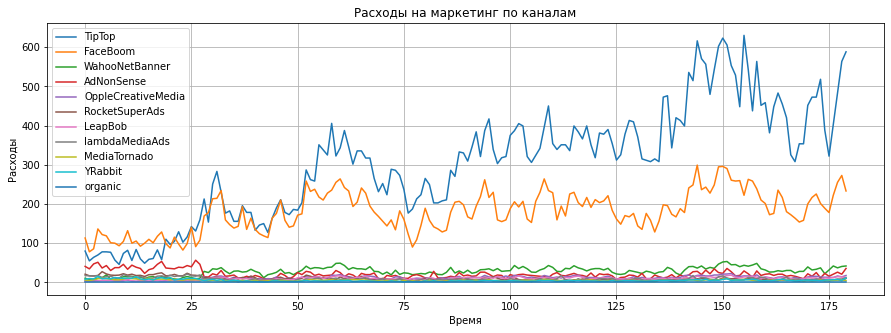

In [25]:
# Построим визуалтзацию изменения расходов на маркетинг по каналам по времени
test.plot(grid=True,figsize=(15,5))
plt.title('Расходы на маркетинг по каналам')
plt.xlabel('Время')
plt.ylabel('Расходы')
plt.show()

In [26]:
# Посчитаем размер коготы - сколько пользоватей зарегистрироваось в приложении и пришло с каждого канала
total_cohort = (profiles.groupby('channel')
                        .agg({'user_id': 'nunique'})
                        .reset_index())

# Соберем в одну талблицу размер коготы и расходы на маркетинг
result = (total_cost.merge(total_cohort, on= 'channel')
                    .drop(columns=['dole,%'])
                    .rename(columns={'user_id' : 'cohort_size'})
                    .set_index('channel'))

# Посчитаем САС
result['cac'] = round(result['acquisition_cost'] / result['cohort_size'], 2)

print('Средний CAC на одного пользователя для всего проекта:', round(result['cac'].mean(), 2))
#print('Средний CAC на одного пользователя для каждого источника трафика:', round(result['acquisition_cost'].mean(), 2))
print()
print(result.sort_values('cac', ascending=False))


Средний CAC на одного пользователя для всего проекта: 0.69

                    acquisition_cost  cohort_size   cac
channel                                                
TipTop                      54751.30        19561  2.80
FaceBoom                    32445.60        29144  1.11
AdNonSense                   3911.25         3880  1.01
lambdaMediaAds               1557.60         2149  0.72
WahooNetBanner               5151.00         8553  0.60
RocketSuperAds               1833.00         4448  0.41
OppleCreativeMedia           2151.25         8605  0.25
MediaTornado                  954.48         4364  0.22
YRabbit                       944.22         4312  0.22
LeapBob                      1797.60         8553  0.21
organic                         0.00        56439  0.00


**Выводы:** 
* Максимальные расходы на привлечение у след.каналов: TipTop, FaceBoom, AdNonSense 	
* Для каналов TipTop, FaceBoom не стабильные затраты и они растут. Для всех остальных каналов расходы более стабильные

(?) TipTop, FaceBoom, AdNonSense  - затраты большие и растут + входт в топ-5 по кол-ву платящих пользователей => нужно проверить окупается ли

## Оценка окупаемости рекламы

In [27]:
# Проверим сколько  платящих пользователй пришло органически
profiles[(profiles['channel']=='organic') & (profiles['payer'] == True)].agg({'user_id':'nunique'})

user_id    1160
dtype: int64

Исключать органический трафик из оценки окупаемости не будем, так как его много и он имеет влияние на общий LTV

In [28]:
#Установим момент и горизонт анализа данных
observation_date = datetime(2019, 10, 27).date()  # момент анализа - максимальная дата за которую есть данные
horizon_days = 14  # горизонт анализа, 14 дней, так как есть условие, что "в бизнес-плане заложено, 
                   # что пользователи должны окупаться не позднее чем через две недели после привлечения"

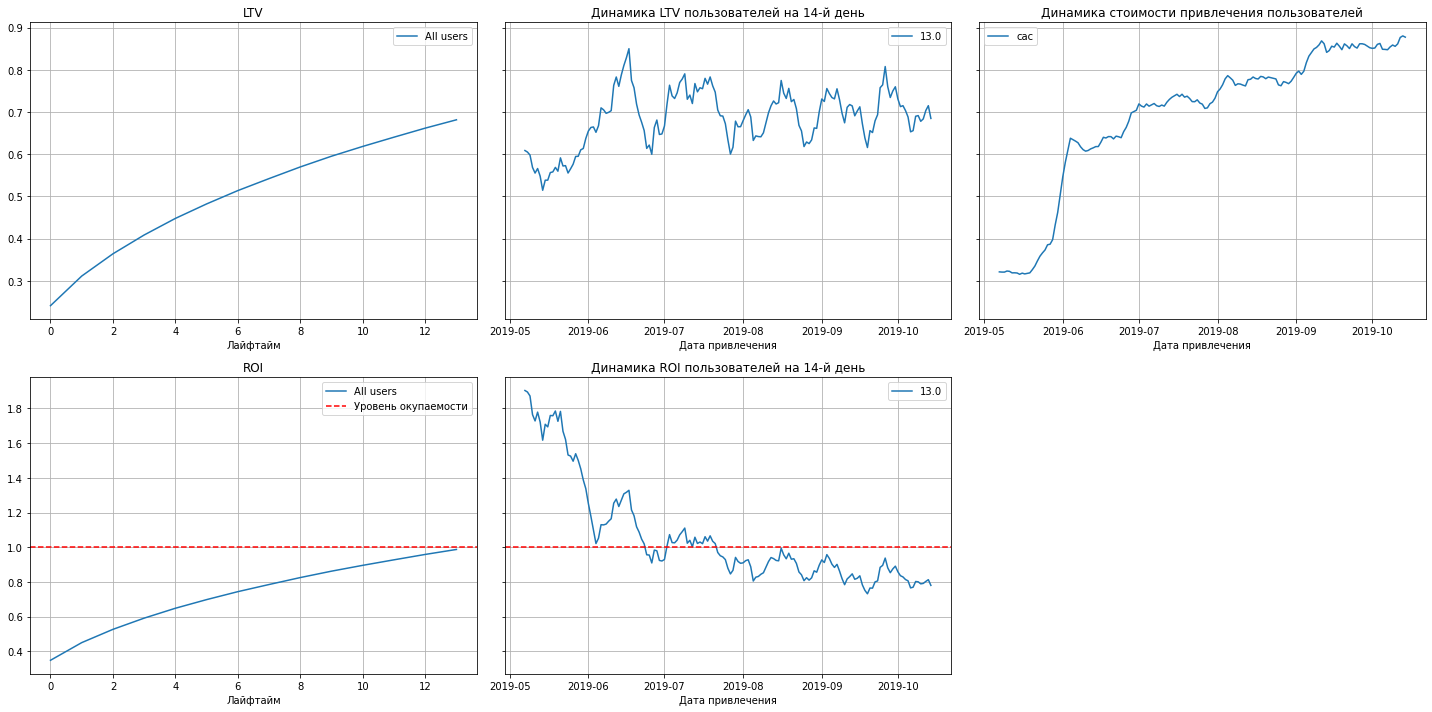

In [29]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:**
* LTV стабильно растет и на него нет внешнего влияния
* Стоимость привчеления пользователей ежемесячно растет, тем самым постоянно увеличиывется рекламный бюджет
* Инвестиции не окупаются за 14 дней: ROI чуть ниже 100%
* Динамика ROI снижается, скрее всего из-за увеличение стоимости превлечения


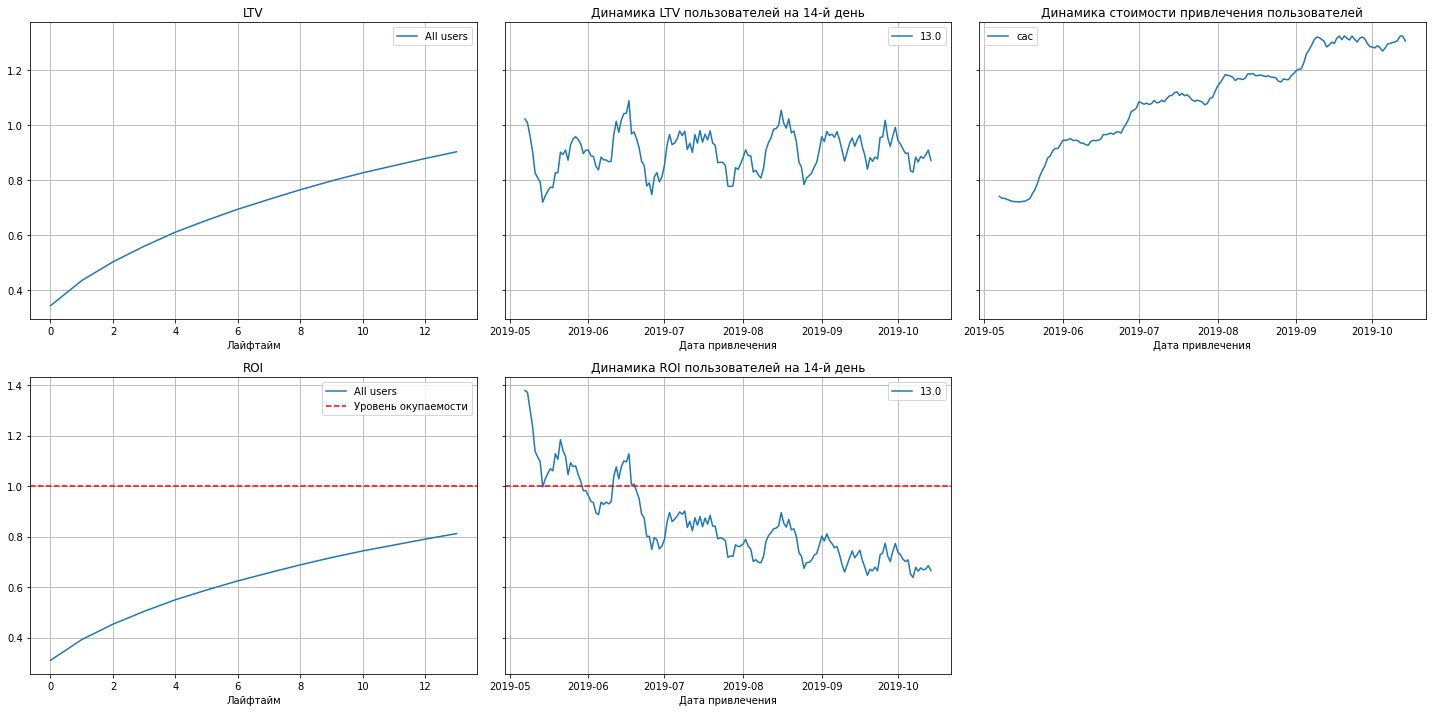

In [30]:
#Исключим органиченйкий трафик
profiles_without_organic = profiles[(profiles['channel']!='organic')]
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_without_organic, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

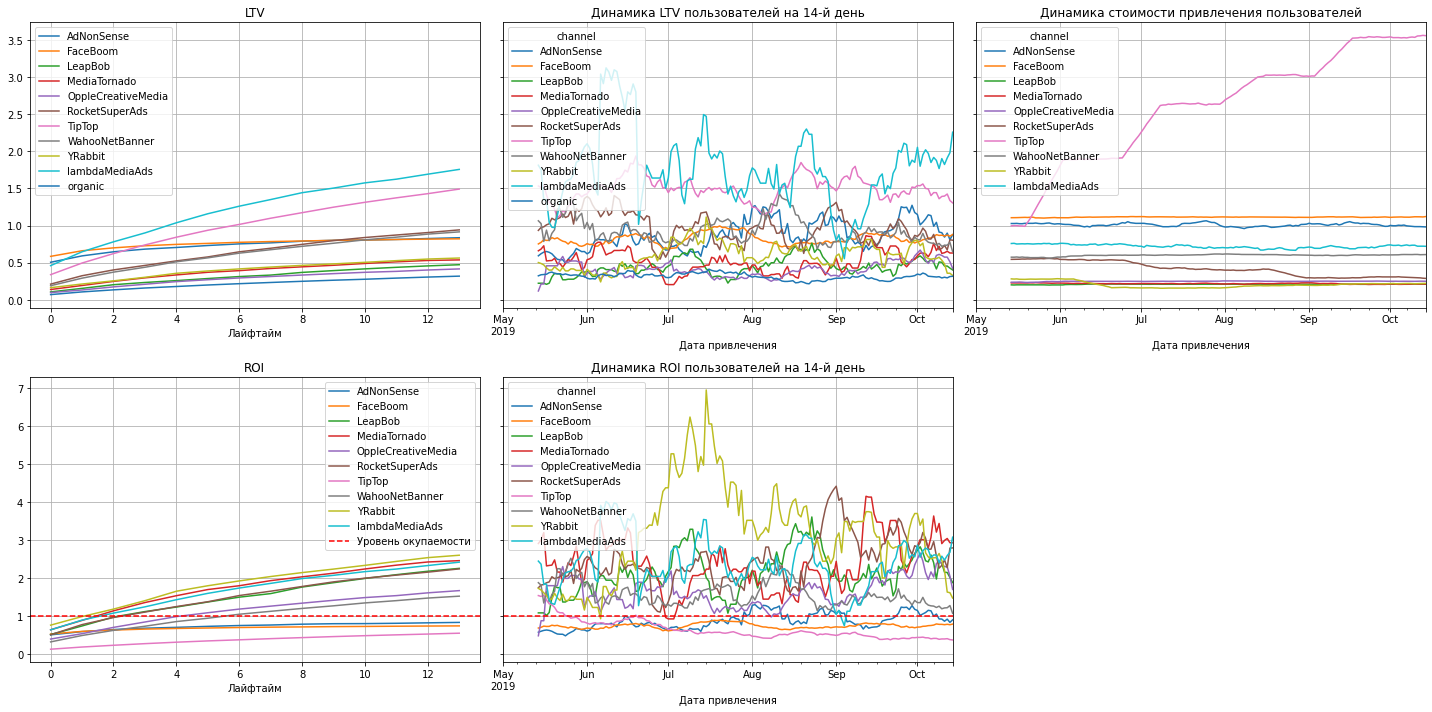

In [31]:
# смотрим окупаемость с разбивкой по источникам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:**
* LTV стабильно растет и на него нет внешнего влияния
* Реклама на 7 из 10 рекламных источников окупается
* Рекламный бюджет стабилен, кроме источника ТipTop Почему нет увелич. расходов для источника FaceBoom (?) 
* Стоит выделить источники:
   * ТipTop - не окупается,  бюджет самый большой из всех каналов и ежемесячно он растет, плятящих пользоватлей - среднее
   * FaceBoom - большие расходы на маркетинг и не окупается реклама, хотя приходят много платящих клинетов
   * AdNonSense - приходят много платящих клинетов, но не окупается, так как дорогая стоимость привлечение пользователей 

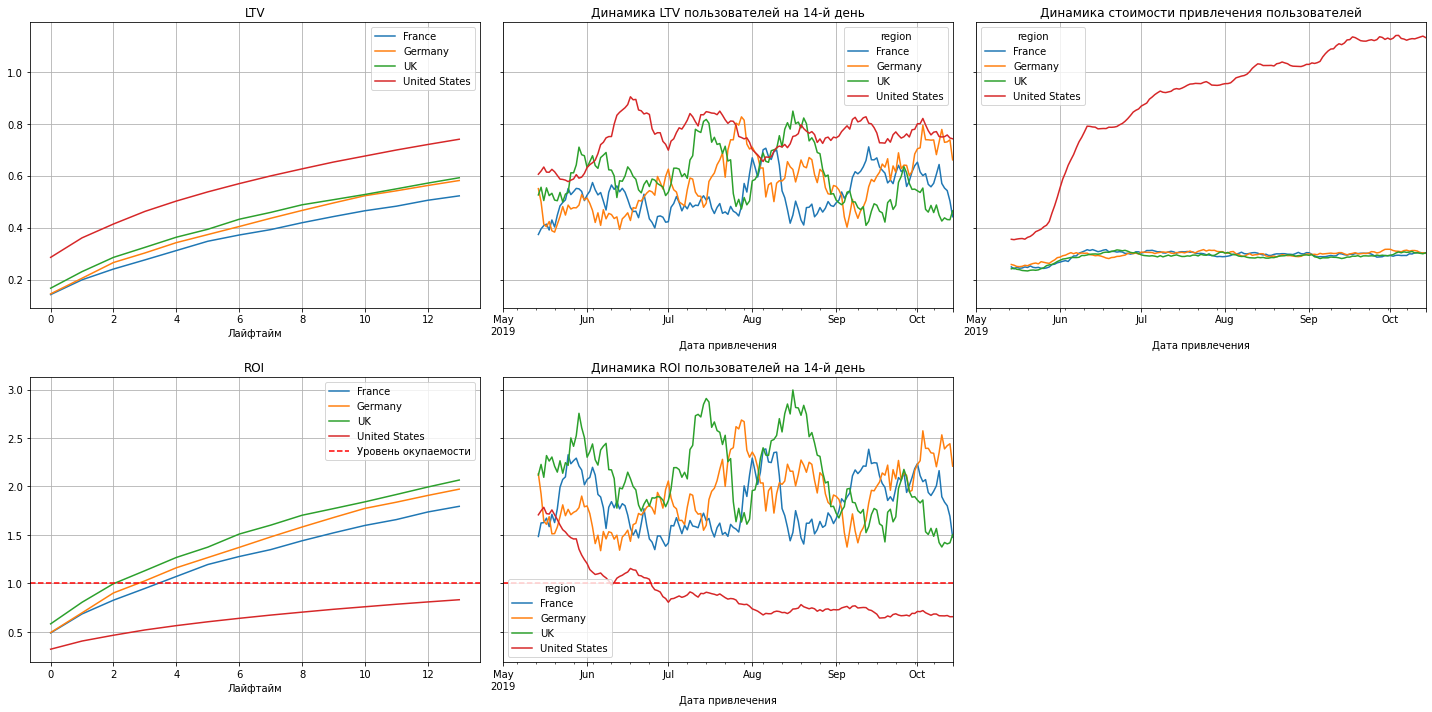

In [32]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:**
* LTV в United States самый высокий и значительно первышает остальные страны, так как там больше всех пользователй и больше платящих пользоватей
* При этом бизнес только в United States не окупается, так как там есть два самых дорогих и неокупаемых канала привлечения - ТipTop и FaceBoom

In [33]:
#Проверим в каких странах какие источникаи используются
profiles.groupby(['region', 'channel']).agg({'user_id':'nunique'})

user_id
region        channel                    
France        AdNonSense             1366
              LeapBob                2988
              OppleCreativeMedia     2991
              WahooNetBanner         2971
              lambdaMediaAds          742
              organic                6392
Germany       AdNonSense             1219
              LeapBob                2519
              OppleCreativeMedia     2562
              WahooNetBanner         2579
              lambdaMediaAds          649
              organic                5453
UK            AdNonSense             1295
              LeapBob                3046
              OppleCreativeMedia     3052
              WahooNetBanner         3003
              lambdaMediaAds          758
              organic                6421
United States FaceBoom              29144
              MediaTornado           4364
              RocketSuperAds         4448
              TipTop                19561
              YRabbit                4312
              organic               38173

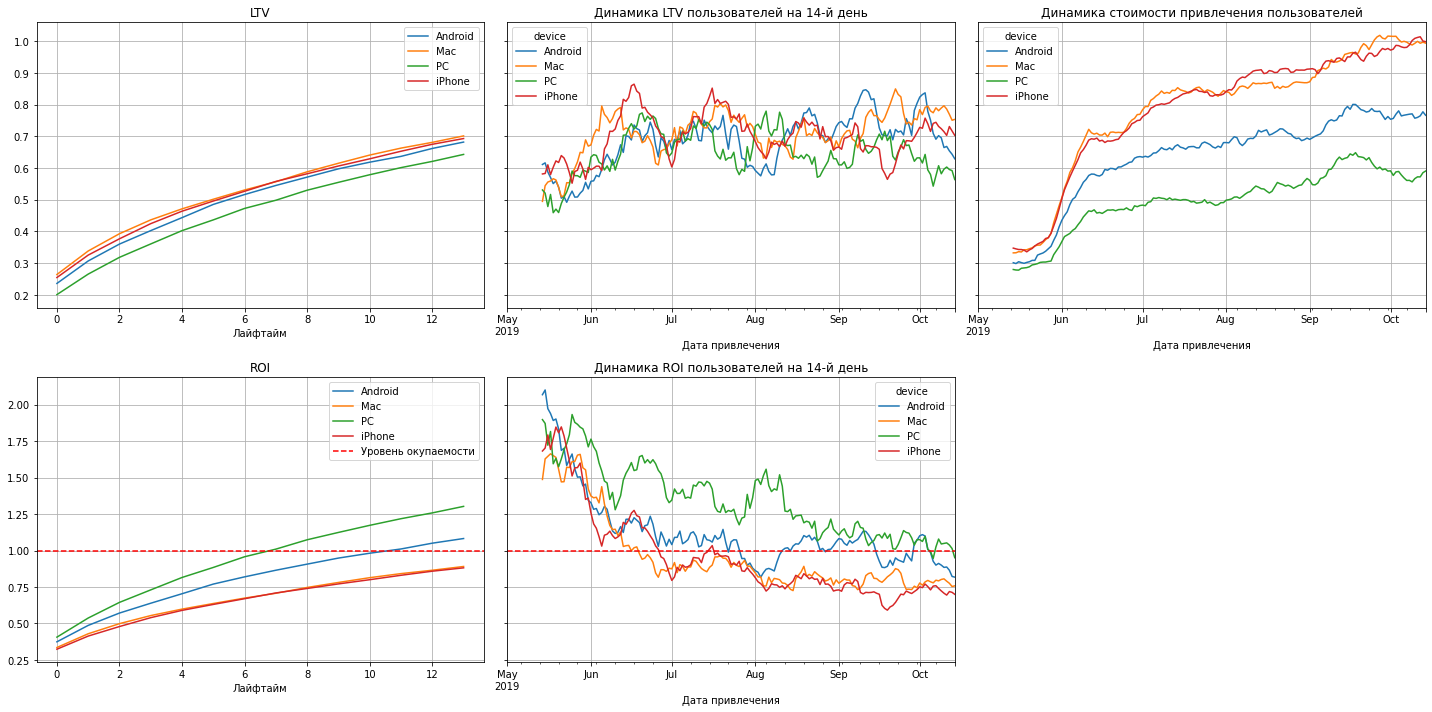

In [34]:
# смотрим окупаемость с разбивкой по устройсвам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:**
* Mac и Iphone не окупается при том, что там больше всего пользователей

**Общие выводы:**
* Бизнес популярен, так как много органического тарифика
* LTV не подвержен сезонности
* LTV в United States самый высокий и значительно первышает остальные страны, так как там больше всех пользователй и больше платящих пользоватей
* При этом бизнес только в United States не окупается, так как там есть два самых дорогих и неокупаемых канала привлечения - ТipTop и FaceBoom 
* Mac и Iphone не окупается при том, что там больше всего пользователе. Потому что больше и затраты на привлечение по дорогим каналам ТipTop и FaceBoom ?


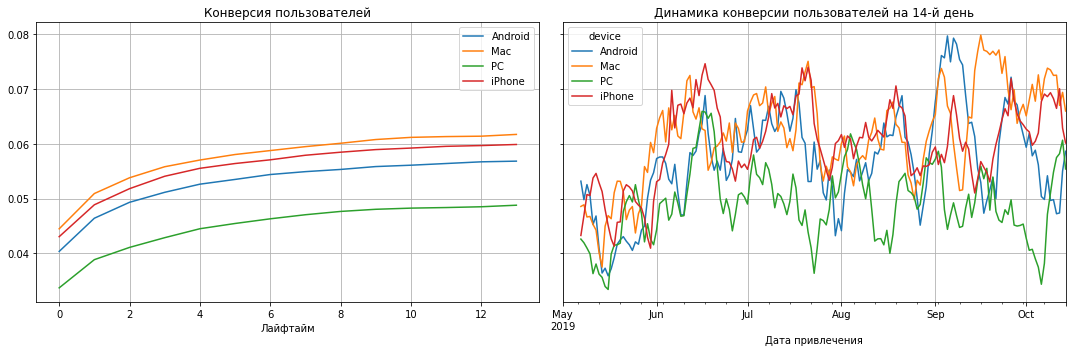

In [35]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Выводы:**
С конверисией все нормально, меньше всего конверсия у PC, потому что там меньше всего пользователей

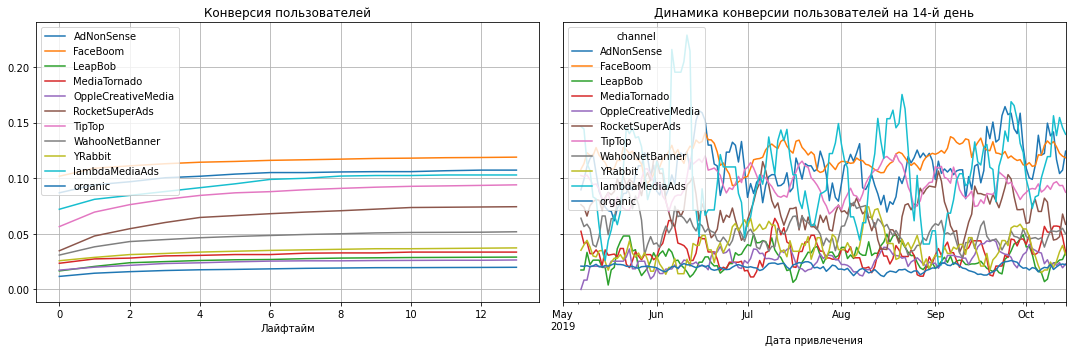

In [36]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Выводы:**
С конверисией все нормально, больне всего конверсия у FaceBoom, AdNonSense, ТipTop которые один из самых дорогих.

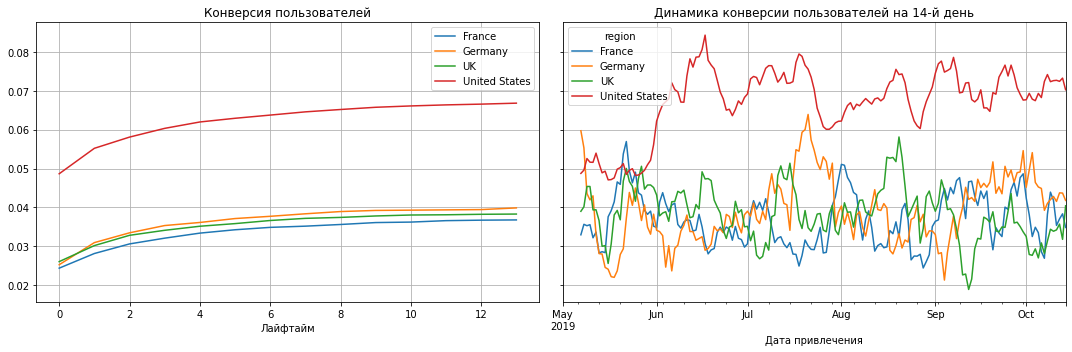

In [37]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Выводы:**
Корверсия United States выше, так как от туда больше пользователей

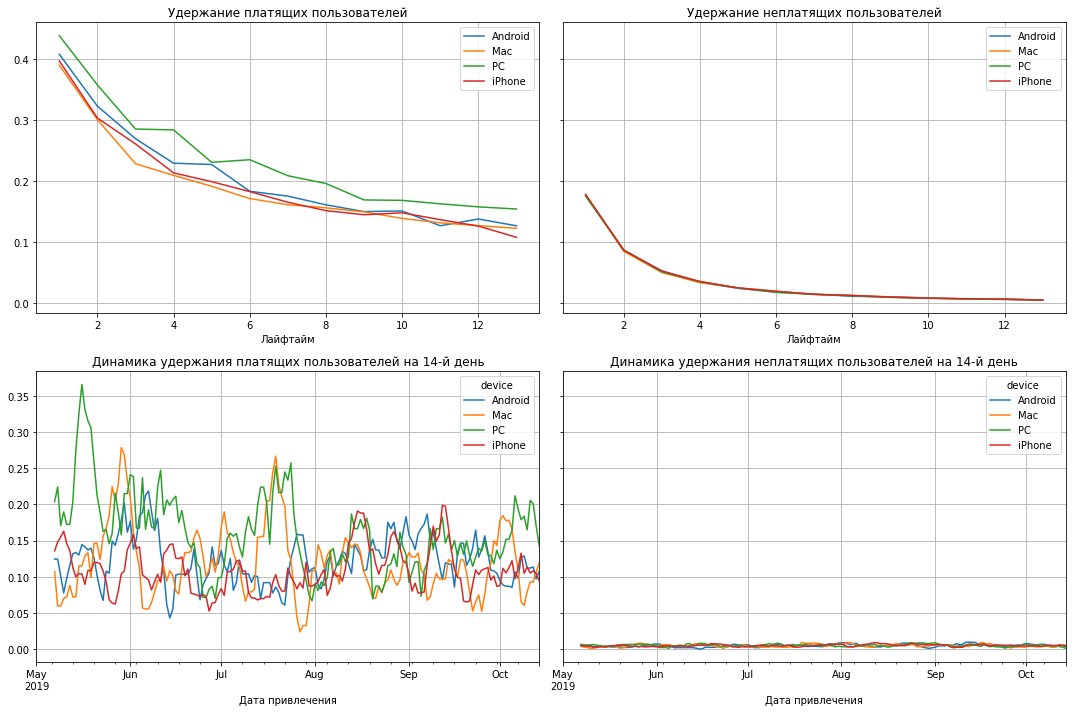

In [38]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
Удержание у пользователей PC выше всех. Жаль, что этосамая малочисленная группа

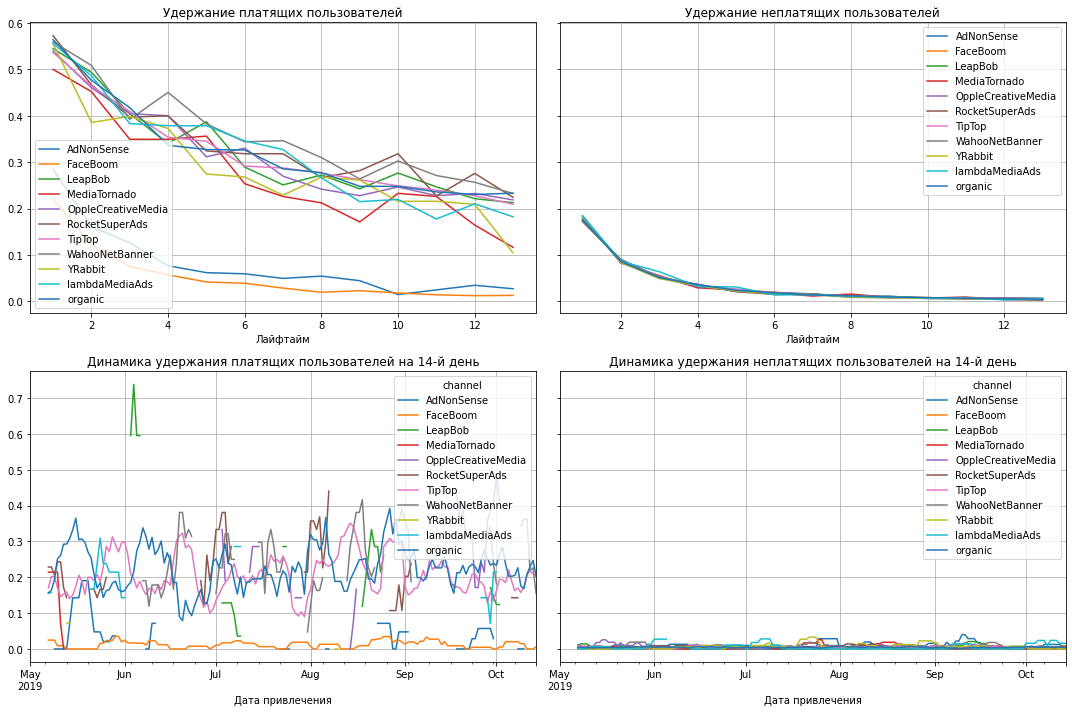

In [39]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
Стабильно плохо удерживаются пользователи, пришедшие из канала FaceBooм и AdNonSense

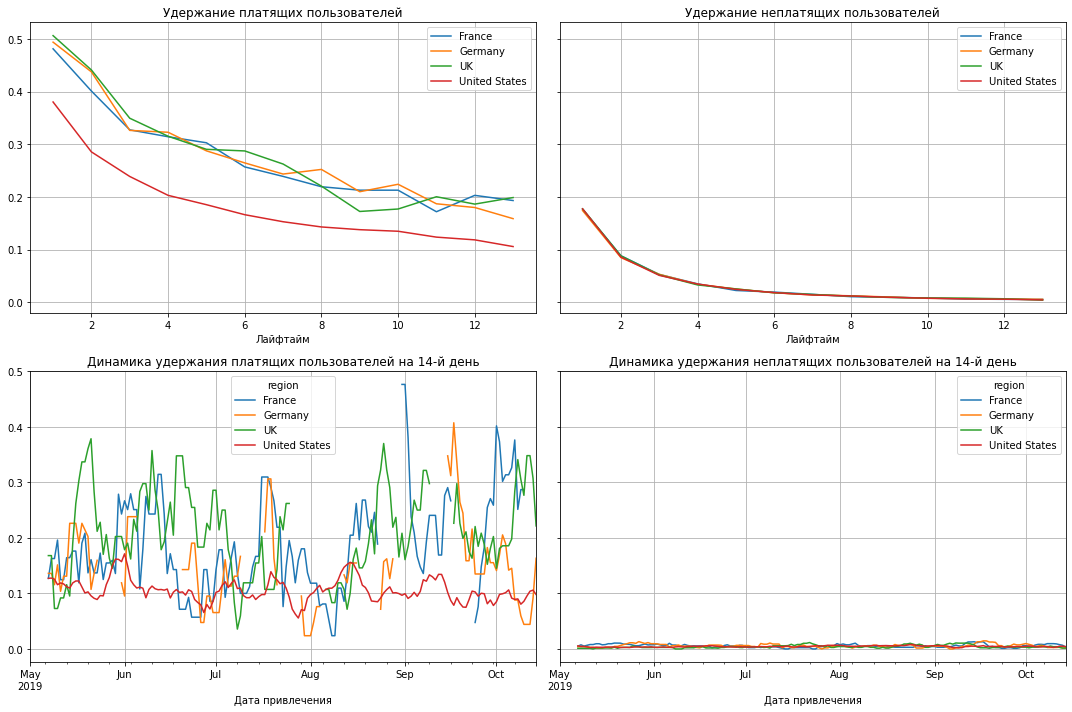

In [40]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
Стабильно плохо удерживаются пользователи в United States, где больше всего дорогих каналов привлечиния, которые еще и плохо удерживаются

**Общие выводы по конверсии и удержанию:**
* Стабильно плохо удерживаются пользователи в United States, пришедшие из канала FaceBooм, что подтверждает, что от этого канала нужно отказываться нужно. Такая же ситуация и с AdNonSense в остальных регионах
* С конверисией все нормально у всех регионов и каналов и устройствах. Корверсия United States выше, так как от туда больше пользователей

## Выводы

**Общие выводы:**
* В целом рекламные инвестиции не окупаются
* Снижает окупаемость в United States источники ТipTop и FaceBoom на Mac и Iphone, а так же в France, Germany, UK источник AdNonSense на Mac и Iphone
* Проблеммы окупаемости связаны в основном с стоимостью рекламы и, соответвенно, высокой стоимости привлечения пользователей
* Для меня остался открытам вопрос - почему не откупаются  Mac и Iphone (?), который стоит дополнительно поисследовать

**Рекомендации:**
* В United States отказаться от использования источников привлечения ТipTop и FaceBoom из-за высокой стоимости привлечения, постоянног роста и низкогоудержания
* Так же нужно отказаться от источника AdNonSense в France, Germany, UK -за  высокой стоимости привлечения пользователей и ниского удержания
* Есть риск в United States, что пользователей станет меньше, так как эти источники привлеками основную массу пользователей, но это кажется не страшным, так как продукт начнет окупаться и в целом он популярен из-за большего кол-ва органического трафика 

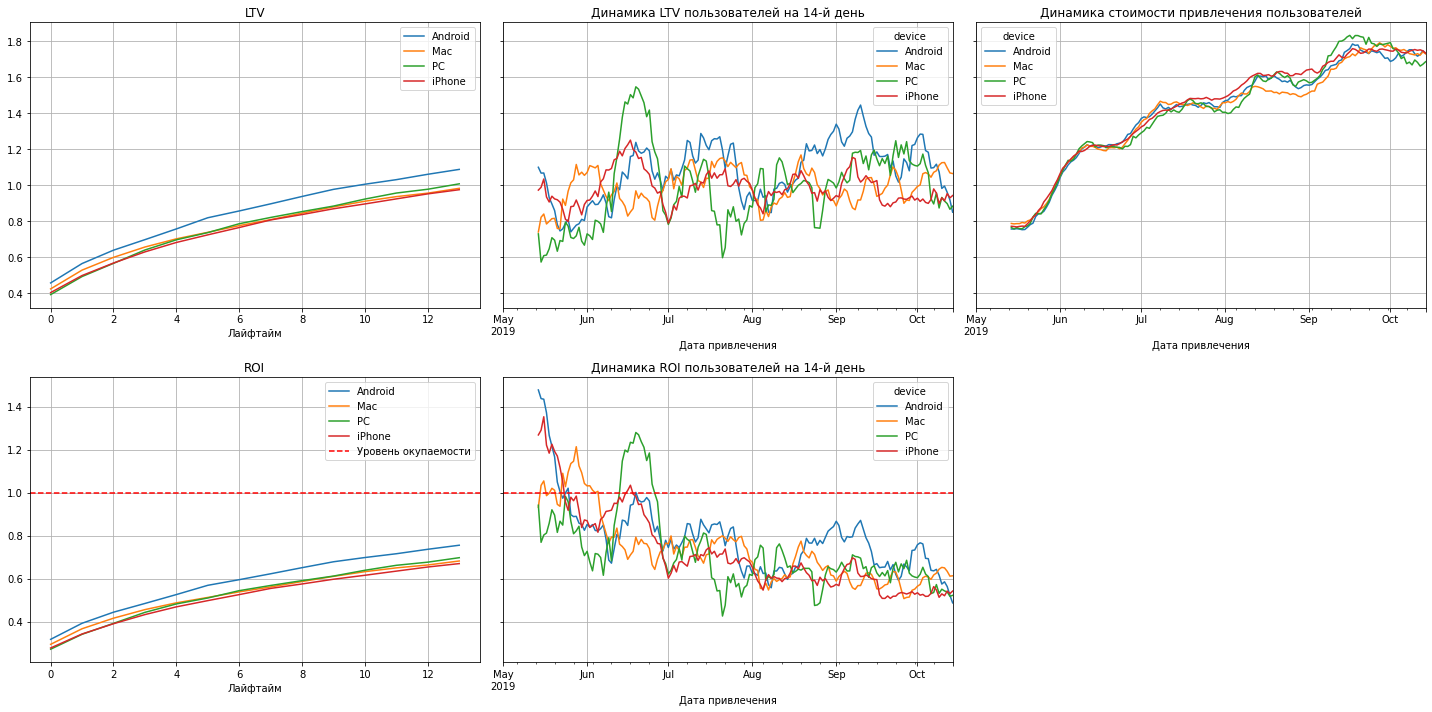

In [41]:
# Изучим рекламу в США в разбивке по устройствам
profiles_USA = profiles[(profiles['region']=='United States') & (profiles['channel']!='organic')]

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA , orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** Картина для USA как и была ранее - не окупается ни одино устройство, затраты растут

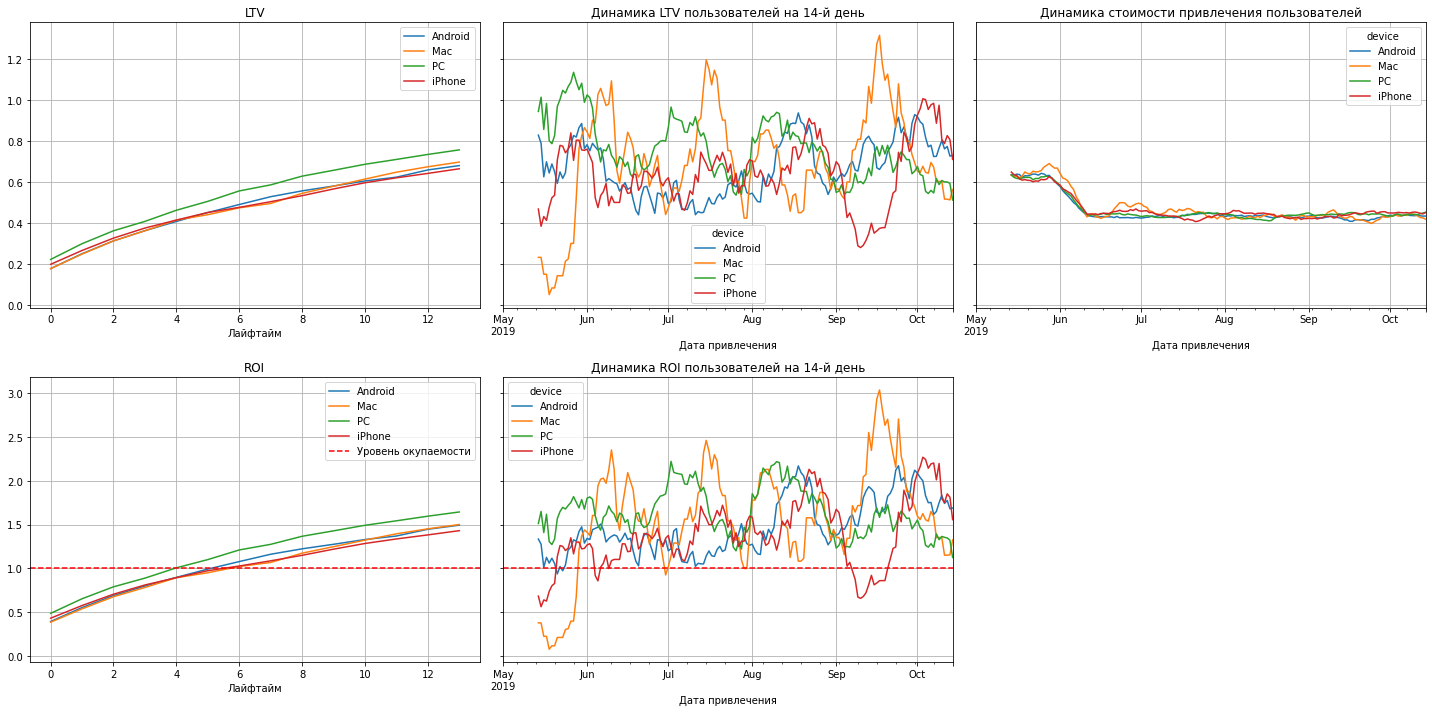

In [42]:
# Изучим рекламу не в США в разбивке по устройствам
profiles_no_USA = profiles[(profiles['region']!='United States') & (profiles['channel']!='organic')]

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_USA , orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** Картина для не USA интреснее - на всех устройствах есть окупаемость, стабильная стоимость привлечения.

In [43]:
# Проверим, где больше пользуются iPhone и Mac
profiles[(profiles['payer']==True) & (profiles['channel']!='organic')].groupby(['region','device']).agg({'user_id':'nunique'})

user_id
region        device          
France        Android      148
              Mac           69
              PC           221
              iPhone       116
Germany       Android      144
              Mac           48
              PC           200
              iPhone        98
UK            Android      173
              Mac           49
              PC           243
              iPhone       104
United States Android     1317
              Mac         1507
              PC           630
              iPhone      2654

**Общий вывод по затратам по устройсвам:** По всем странам видно, что устройства iPhone и Mac не окупаются, вклад в это вносит US, которая не окупается из-за больших растущих затратах на рекламу и потому что там пользователи предпочитеют устройска Apple